# Naive Bayes 

- In this notebook, we will build a classification model using Naive Bayes to predict whether a flight will be delayed or not based on various factors such as the day of the week, departure time, origin, destination, and carrier.

- We will use the scikit-learn package for training, evaluating, and making predictions with the classification model. Additionally, we will utilize the pandas library for data manipulation. The MultinomialNB function from scikit-learn will be used for the Naive Bayes model.

## 1. Naive Bayes on “Flight Delays” dataset

### (1) Prepare the data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pylab as plt

In [2]:
url = "https://raw.github.com/niharikabalachandra/Logistic-Regression/master/FlightDelays.csv"
delays_df = pd.read_csv(url)

In [3]:
delays_df.head()

,schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime


### (2) Preprocessing

- Convert certain columns to categorical variables.
- Round the departure times to create hourly bins.

In [4]:
# convert to categorical
delays_df.dayweek = delays_df.dayweek.astype('category') # In sklearn, Naive Bayes is implemented using only numerical or categorical(binary) variables -> independence for each variable is not secured
delays_df['delay'] = delays_df['delay'].astype('category')

# create hourly bins departure time 
delays_df.schedtime = [round(t / 100) for t in delays_df.schedtime]
delays_df.schedtime = delays_df.schedtime.astype('category')

predictors = ['dayweek', 'schedtime', 'origin', 'dest', 'carrier']
outcome = 'delay'

X = pd.get_dummies(delays_df[predictors])
y = delays_df['delay']

classes = list(y.cat.categories)

In [5]:
X.head(2)

,dayweek_1,dayweek_2,dayweek_3,dayweek_4,dayweek_5,dayweek_6,dayweek_7,schedtime_6,schedtime_7,schedtime_8,...,dest_JFK,dest_LGA,carrier_CO,carrier_DH,carrier_DL,carrier_MQ,carrier_OH,carrier_RU,carrier_UA,carrier_US
0,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False


### (3) Split the data into training and test sets

In [6]:
# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)

### (4) Define and train a Naive Bayes model

In [7]:
# run naive Bayes
clf = MultinomialNB(alpha=0.01) # alpha: laplace smoothing parameter
clf.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

### (5) Predict probabilities and class membership

In [8]:
# predict probabilities
predProb_train = clf.predict_proba(X_train)
predProb_test = clf.predict_proba(X_test)

# predict class membership
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [9]:
# Subset a specific set
df = pd.concat([pd.DataFrame({'actual': y_test, 'predicted': y_test_pred}),
                pd.DataFrame(predProb_test, index=y_test.index)], axis=1)
mask = ((X_test.carrier_DL == 1) & (X_test.dayweek_7 == 1) & (X_test.schedtime_10 == 1) & 
        (X_test.dest_LGA == 1) & (X_test.origin_DCA == 1))

print(df[mask])

      actual predicted         0         1
1225  ontime    ontime  0.057989  0.942011


### (6) Generate probability frequency tables

In [10]:
# split the original data frame into a train and test using the same random_state
train_df, test_df = train_test_split(delays_df, test_size=0.4, random_state=1)

pd.set_option('display.precision', 4)
# probability of flight status
print(train_df['delay'].value_counts() / len(train_df))
print()

for predictor in predictors:
    # construct the frequency table
    df = train_df[['delay', predictor]]
    freqTable = df.pivot_table(index='delay', columns=predictor, aggfunc=len)

    # divide each row by the sum of the row to get conditional probabilities
    propTable = freqTable.apply(lambda x: x / sum(x), axis=1)
    print(propTable)
    print()
pd.reset_option('display.precision')

delay
ontime     0.8023
delayed    0.1977
Name: count, dtype: float64

dayweek       1       2       3       4       5      6       7
delay                                                         
delayed  0.1916  0.1494  0.1149  0.1264  0.1877  0.069  0.1609
ontime   0.1246  0.1416  0.1445  0.1794  0.1690  0.136  0.1048

schedtime       6       7       8       9      10      11      12      13  \
delay                                                                       
delayed    0.0345  0.0536  0.0651  0.0192  0.0307  0.0115  0.0498  0.0460   
ontime     0.0623  0.0633  0.0850  0.0567  0.0519  0.0340  0.0661  0.0746   

schedtime      14      15      16      17      18      19      20      21  
delay                                                                      
delayed    0.0383  0.2031  0.0728  0.1533  0.0192  0.0996  0.0153  0.0881  
ontime     0.0576  0.1171  0.0774  0.1001  0.0349  0.0397  0.0264  0.0529  

origin      BWI     DCA     IAD
delay                         

/var/folders/xj/_swws2td1j333fqkjhr5tmjr0000gn/T/ipykernel_50216/76458803.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  freqTable = df.pivot_table(index='delay', columns=predictor, aggfunc=len)
/var/folders/xj/_swws2td1j333fqkjhr5tmjr0000gn/T/ipykernel_50216/76458803.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  freqTable = df.pivot_table(index='delay', columns=predictor, aggfunc=len)
/var/folders/xj/_swws2td1j333fqkjhr5tmjr0000gn/T/ipykernel_50216/76458803.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain th

### (7) Calculate the posterior probabilities for specific cases

In [11]:
# P(delayed | Carrier = DL, Day_Week = 7, Dep_Time = 10, Dest = LGA, Origin = DCA)
P_hat_delayed = 0.0958 * 0.1609 * 0.0307 * 0.4215 * 0.5211 * 0.1977
# P(ontime | Carrier = DL, Day_Week = 7, Dep_Time = 10, Dest = LGA, Origin = DCA)
P_hat_ontime = 0.2040 * 0.1048 * 0.0519 * 0.5779 * 0.6478 * 0.8023
print('P_hat_delayed ~ ', P_hat_delayed)
print('P_hat_ontime ~ ', P_hat_ontime)

print('P(delayed|...) = ', P_hat_delayed / (P_hat_delayed + P_hat_ontime))
print('P(ontime|...) = ', P_hat_ontime / (P_hat_delayed + P_hat_ontime))

P_hat_delayed ~  2.0548742506526157e-05
P_hat_ontime ~  0.00033326464123921066
P(delayed|...) =  0.05807791183301656
P(ontime|...) =  0.9419220881669834


### (8) Evaluate the model using confusion matrix and ROC curve

In [12]:
print(clf.score(X_test, y_test))

0.7820658342792282


Confusion Matrix:
[[ 26 141]
 [ 51 663]]


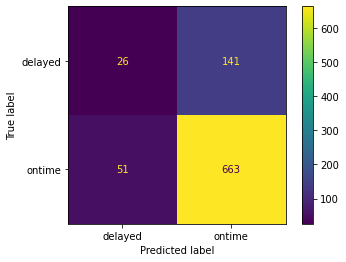

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

plt.show()

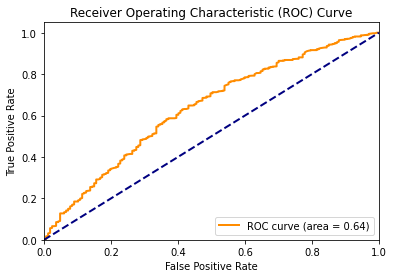

AUC: 0.64


In [14]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()  
y_test_binary = lb.fit_transform(y_test)

fpr, tpr, thresholds = roc_curve(y_test_binary, predProb_test[:,1])  
roc_auc = auc(fpr, tpr)  

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 대각선 (랜덤 모델)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f'AUC: {roc_auc:.2f}')